In [1]:
import os
import sys
sys.path.append("/home/rohit/PhD_Work/GM_my_version/Graph_matching/")
from sklearn.cluster import KMeans
import networkx as nx
import numpy as np
from graph_generation.load_graphs_and_create_metadata import dataset_metadata
from graph_matching_tools.metrics import matching
import matplotlib.pyplot as plt
import scipy.io as sio

In [2]:
path_to_graph_folder = '/home/rohit/PhD_Work/GM_my_version/Graph_matching/data/simu_graph/simu_test_single_noise/'
path_to_dummy_graph_folder = '/home/rohit/PhD_Work/GM_my_version/Graph_matching/data/simu_graph/simu_with_dummy/'

In [3]:
def get_permutation_matrix_from_dictionary(matching, g_sizes):
    """
    Create the full permutation matrix from the matching result
    :param matching: the matching result for each graph (nodes number, assignment)
    :param g_sizes: the list of the size of the different graph
    :return: the full permutation matrix
    """
    f_size = int(np.sum(g_sizes))
    res = np.zeros((f_size, f_size))

    idx1 = 0
    for i_g1 in range(len(g_sizes)):
        idx2 = 0
        for i_g2 in range(len(g_sizes)):
            match = matching["{},{}".format(i_g1, i_g2)]
            for k in match:
                res[idx1 + int(k), idx2 + match[k]] = 1
            idx2 += g_sizes[i_g2]
        idx1 += g_sizes[i_g1]
        
    np.fill_diagonal(res,1)
    return res

In [4]:
mALS_trials = ['0.0','0.1','0.2','0.3','0.4','0.6']

In [5]:
trials = np.sort(os.listdir(path_to_graph_folder))

scores = {100:[],400:[],700:[],1000:[],1300:[]}

for trial in trials:
    
    if trial in mALS_trials:
            
        print('trial: ', trial)

        all_files = os.listdir(path_to_graph_folder+trial)

        for folder in all_files:

            if os.path.isdir(path_to_graph_folder+trial+'/'+ folder):

                print('Noise folder: ',folder)

                path_to_graphs = path_to_graph_folder + '/' + trial + '/' + folder+'/graphs/'
                path_to_dummy_graphs = path_to_dummy_graph_folder + '/' + trial +'/' + folder + '/0/graphs/'
                path_to_groundtruth_ref = path_to_graph_folder + '/' + trial +'/' + folder + '/permutation_to_ref_graph.gpickle'
                path_to_groundtruth  = path_to_graph_folder + '/' + trial + '/' + folder + '/ground_truth.gpickle'

                noise = folder.split(',')[0].split('_')[1]

                graph_meta = dataset_metadata(path_to_graphs, path_to_groundtruth_ref)
                ground_truth =  nx.read_gpickle(path_to_groundtruth)   
                res = get_permutation_matrix_from_dictionary(ground_truth, graph_meta.sizes)


                all_dummy_graphs = [nx.read_gpickle(path_to_dummy_graphs+'/'+g) for g in np.sort(os.listdir(path_to_dummy_graphs))]
                X_mALS = sio.loadmat(path_to_graph_folder + '/' + trial + '/' + folder +'/X_mALS.mat')['X']            
                dummy_mask = [list(nx.get_node_attributes(graph,'is_dummy').values()) for graph in all_dummy_graphs]
                dummy_mask = sum(dummy_mask,[])
                dummy_indexes = [i for i in range(len(dummy_mask)) if dummy_mask[i]==True]            
                X_mALS = np.delete(X_mALS,dummy_indexes,0) # delete the dummy rows
                X_mALS = np.delete(X_mALS,dummy_indexes,1) # delete the dummy columns


                print('res shape: ',res.shape)
                print('X shape: ',X_mALS.shape)


                f1, prec, rec = matching.compute_f1score(X_mALS,res)

                scores[int(noise)].append(f1)

trial:  0.0
Noise folder:  noise_100,outliers_varied
res shape:  (11434, 11434)
X shape:  (11434, 11434)
Noise folder:  noise_400,outliers_varied
res shape:  (11361, 11361)
X shape:  (11361, 11361)
Noise folder:  noise_700,outliers_varied
res shape:  (11279, 11279)
X shape:  (11279, 11279)
Noise folder:  noise_1300,outliers_varied
res shape:  (11432, 11432)
X shape:  (11432, 11432)
Noise folder:  noise_1000,outliers_varied
res shape:  (11318, 11318)
X shape:  (11318, 11318)
trial:  0.1
Noise folder:  noise_100,outliers_varied
res shape:  (11337, 11337)
X shape:  (11337, 11337)
Noise folder:  noise_400,outliers_varied
res shape:  (11406, 11406)
X shape:  (11406, 11406)
Noise folder:  noise_700,outliers_varied
res shape:  (11169, 11169)
X shape:  (11169, 11169)
Noise folder:  noise_1300,outliers_varied
res shape:  (11248, 11248)
X shape:  (11248, 11248)
Noise folder:  noise_1000,outliers_varied
res shape:  (11358, 11358)
X shape:  (11358, 11358)
trial:  0.2
Noise folder:  noise_100,outli

In [7]:
scores

{100: [0.5100754248624658,
  0.5275669202769723,
  0.5449488336948521,
  0.5260399732972679,
  0.5264566860071579,
  0.5338162993455154],
 400: [0.8932668871935948,
  0.919783945436573,
  0.9171818310304458,
  0.9128862467458767,
  0.9053201597859352,
  0.9216623258611754],
 700: [0.9332267201323913,
  0.9459604612449727,
  0.9277577694965848,
  0.9344088651188525,
  0.9387308551164556,
  0.9398336476878736],
 1000: [0.9380620970030821,
  0.942661991080193,
  0.9373135701864616,
  0.9388515546048312,
  0.9378508699674317,
  0.9387726824159668],
 1300: [0.9348714323277906,
  0.9412844444585586,
  0.9428310402448737,
  0.9436471059815801,
  0.9378670048575052,
  0.944591041408666]}

In [8]:
k_70 = nx.read_gpickle('kmeans_score_k_70.gpickle')
k_90 = nx.read_gpickle('kmeans_score_k_90.gpickle')
k_110 = nx.read_gpickle('kmeans_score_k_110.gpickle')
msync = nx.read_gpickle('mSync_scores.gpickle')

In [17]:
nx.write_gpickle(scores,'mALS_score.gpickle')

In [10]:
def score_mean_std(scores):
    
    avg_scores = []
    std_scores = []

    for keys,values in scores.items():
        avg_scores.append(np.mean(values))
        std_scores.append(np.std(values))
        
    return np.array(avg_scores), np.array(std_scores)

In [11]:
k_70_mean, k_70_std  = score_mean_std(k_70)
k_90_mean, k_90_std  = score_mean_std(k_90)
k_110_mean, k_110_std = score_mean_std(k_110)
msync_mean, msync_std = score_mean_std(msync)
mals_mean, mals_std = score_mean_std(scores)

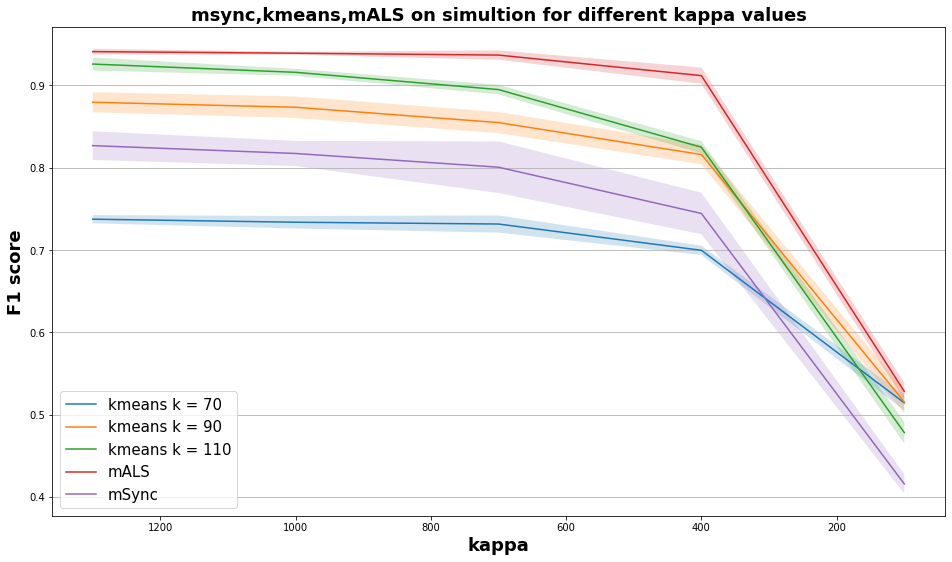

In [16]:
fig = plt.figure(figsize=(16, 9))

plt.plot(list(k_70.keys()), k_70_mean ,label = 'kmeans k = 70')
plt.fill_between(list(k_70.keys()), k_70_mean-k_70_std, k_70_mean + k_70_std, alpha=0.2)

plt.plot(list(k_90.keys()), k_90_mean ,label = 'kmeans k = 90')
plt.fill_between(list(k_90.keys()), k_90_mean - k_90_std, k_90_mean + k_90_std, alpha=0.2)

plt.plot(list(k_110.keys()), k_110_mean ,label = 'kmeans k = 110')
plt.fill_between(list(k_110.keys()), k_110_mean - k_110_std, k_110_mean + k_110_std, alpha=0.2)

plt.plot(list(scores.keys()), mals_mean ,label = 'mALS')
plt.fill_between(list(scores.keys()), mals_mean - mals_std, mals_mean + mals_std, alpha=0.2)

plt.plot(list(msync.keys()), msync_mean ,label = 'mSync')
plt.fill_between(list(msync.keys()), msync_mean - msync_std, msync_mean + msync_std, alpha=0.2)

plt.xlabel('kappa',fontweight="bold",fontsize=18)
plt.ylabel('F1 score',fontweight="bold",fontsize=18)
plt.legend(loc = 'lower left')
plt.title('msync,kmeans,mALS on simultion for different kappa values',fontweight="bold",fontsize=18)
plt.gca().yaxis.grid(True)
plt.gca().invert_xaxis()
plt.legend(loc=3, prop={'size': 15})
plt.show()
fig.savefig('Scores Kmeans_Kergm_mSync.png')